# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
df

id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0      842302         M  ...                  0.11890          NaN
1      842517         M  ...                  0.08902          NaN
2    84300903         M  ...                  0.08758          NaN
3    84348301         M  ...                  0.17300          NaN
4    84358402         M  ...                  0.07678          NaN
..        ...       ...  ...                      ...          ...
564    926424         M  ...                  0.07115          NaN
565    926682         M  ...                  0.06637          NaN
566    926954         M  ...                  0.07820          NaN
567    927241         M  ...                  0.12400          NaN
568     92751         B  ...                  0.07039          NaN

[569 rows x 33 columns]

## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [58]:
cancer = df['diagnosis'].replace({'B':0, 'M':1})

df = df.drop('id', axis=1)
df = df.drop('diagnosis', axis=1)
df = df.drop('Unnamed: 32', axis=1)
df.head()

radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758
3        11.42         20.38  ...          0.6638                  0.17300
4        20.29         14.34  ...          0.2364                  0.07678

[5 rows x 30 columns]

## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [32]:
# Perform K-Means Clustering on the Dataset
df.describe()

radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
count   569.000000    569.000000  ...      569.000000               569.000000
mean     14.127292     19.289649  ...        0.290076                 0.083946
std       3.524049      4.301036  ...        0.061867                 0.018061
min       6.981000      9.710000  ...        0.156500                 0.055040
25%      11.700000     16.170000  ...        0.250400                 0.071460
50%      13.370000     18.840000  ...        0.282200                 0.080040
75%      15.780000     21.800000  ...        0.317900                 0.092080
max      28.110000     39.280000  ...        0.663800                 0.207500

[8 rows x 30 columns]

In [21]:
# Are the observations per dimension greater than 5?
len(df)/len(df.columns)

18.966666666666665

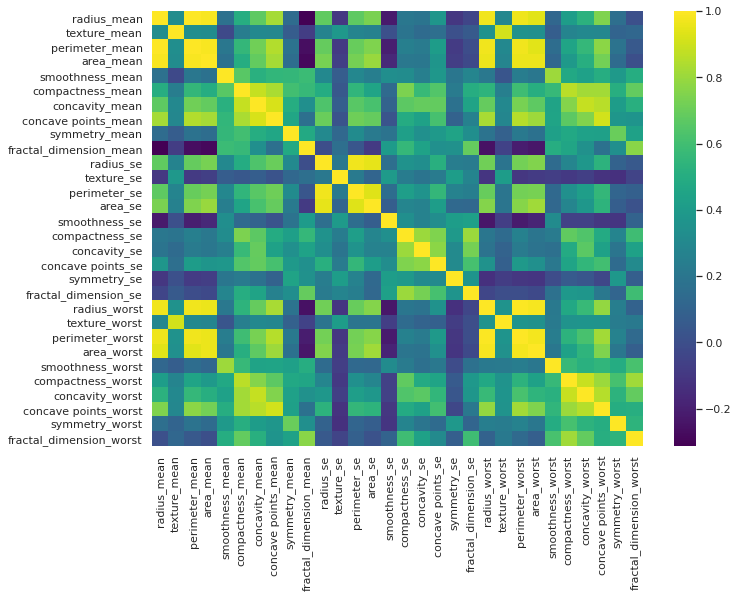

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(11,8))
sns.heatmap(df.corr(), cmap='viridis')
plt.show()

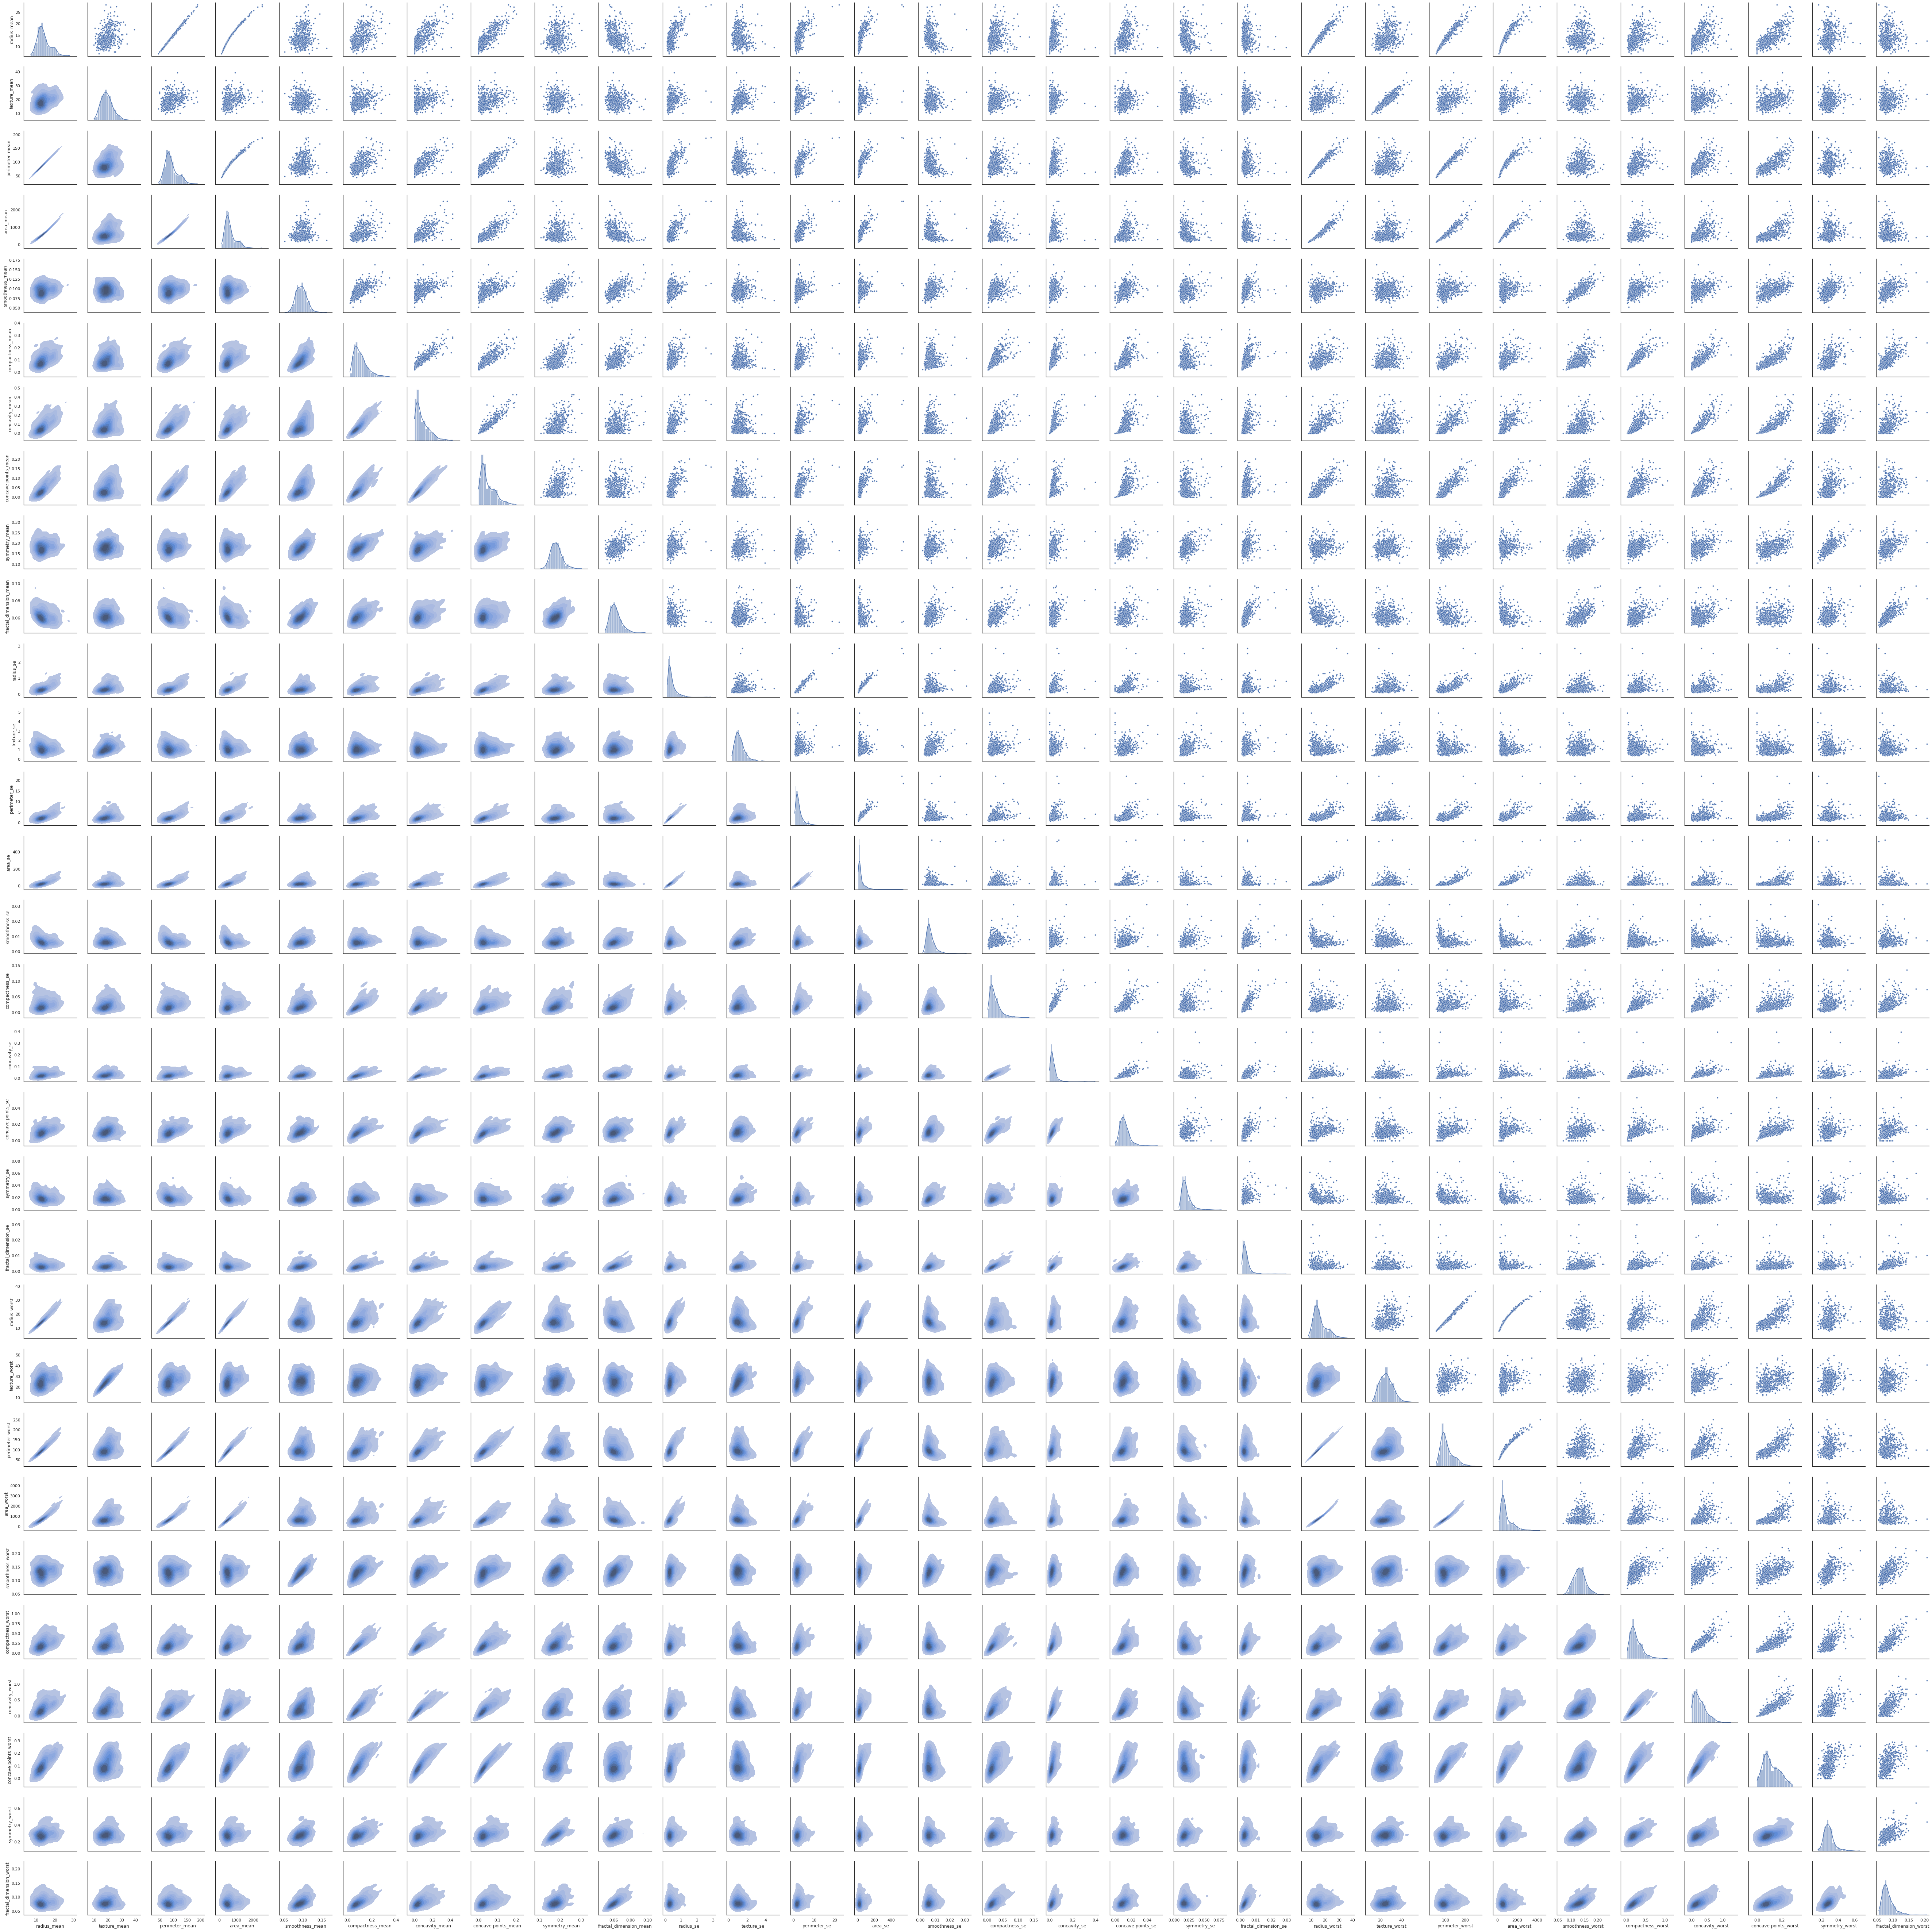

In [19]:
# This takes ~8 minutes to complete

# !pip install --user --upgrade seaborn
# import seaborn as sns

g = sns.PairGrid(df)
g.map_upper(sns.scatterplot, s=15)
# g.map_upper(sns.histplot)
g.map_diag(sns.histplot, kde=True);
g.map_lower(sns.kdeplot, fill=True)

I don't see a lot of clusters, just a lot of dimensions with a Maxwell–Boltzmann distribution (left skewed normal) of varying degrees of skew. I'm skeptical that sklearn.preprocessing.StandardScaler is appropriate, because that assumes normal distributions (or at least similar distributions for all columns). Before the data is (x-u)/s, it should be brought to normal by some log transform or something, but I don't know how to automate that for varying degrees of skew. My guess would be something like log(skew) * (x-u)/s.

In [ ]:
# An attempt at this example.
# https://seaborn.pydata.org/examples/kde_ridgeplot.html
# This code currently takes > 10 min to complete, so it needs some work.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

tidy = df.melt(value_vars=df.columns)

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(tidy, row='value', hue='variable', aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
# mountains
g.map(sns.kdeplot, 'variable', bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
# white overlap lines
g.map(sns.kdeplot, 'variable', clip_on=False, color="w", lw=2, bw_adjust=.5)
# baselines
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, 'variable')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)


## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [130]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the Data using a Standard Scaler object
scaler = StandardScaler()
Z = scaler.fit_transform(df)

# fit PCA on data
pca = PCA()
pca.fit(Z)

# transform data
P = pca.transform(Z)

# turn into a nice Dataframe
col_names = ['PC'+str(i) for i in range(1,31)]
pca_data = pd.DataFrame(P, columns=col_names)
pca_data

PC1        PC2       PC3  ...      PC28      PC29      PC30
0     9.192837   1.948583 -1.123166  ... -0.033914  0.045648 -0.047169
1     2.387802  -3.768172 -0.529293  ...  0.032624 -0.005687 -0.001868
2     5.733896  -1.075174 -0.551748  ...  0.047026  0.003146  0.000751
3     7.122953  10.275589 -3.232790  ...  0.042484 -0.069295 -0.019937
4     3.935302  -1.948072  1.389767  ... -0.034786  0.005038  0.021214
..         ...        ...       ...  ...       ...       ...       ...
564   6.439315  -3.576817  2.459487  ...  0.009853  0.007119 -0.001415
565   3.793382  -3.584048  2.088476  ... -0.023575 -0.027486 -0.010419
566   1.256179  -1.902297  0.562731  ... -0.002578  0.006706  0.003770
567  10.374794   1.672010 -1.877029  ... -0.068086 -0.084163 -0.023783
568  -5.475243  -0.670637  1.490443  ... -0.009516 -0.060913 -0.019476

[569 rows x 30 columns]

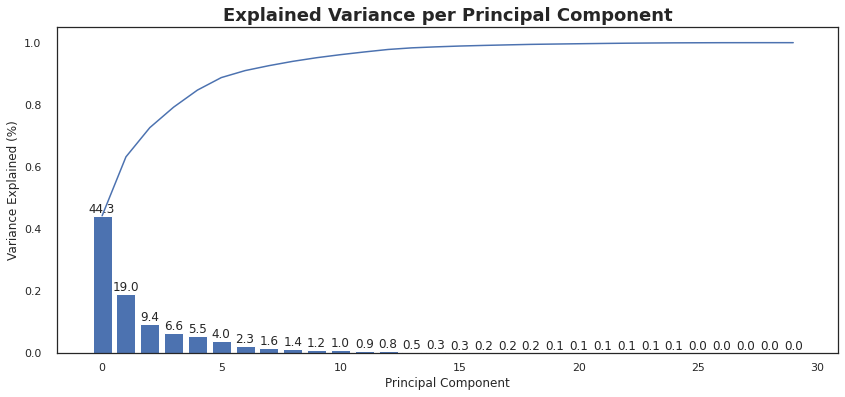

In [60]:
# Scree Plot
vals = pca.explained_variance_ratio_
cumvals = np.cumsum(vals)
ind = range(len(vals))

plt.figure(figsize=(14, 6))
ax = plt.subplot(111)
ax.bar(ind, vals)
ax.plot(ind, cumvals)
for i in ind:
    ax.annotate("%s" % format(vals[i]*100,'.1f'), (i, vals[i]), va="bottom", ha="center", fontsize=12)

ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=2, length=12)

ax.set(xlabel='Principal Component', ylabel='Variance Explained (%)')
plt.title('Explained Variance per Principal Component', fontsize=18, fontweight='bold')
plt.show()

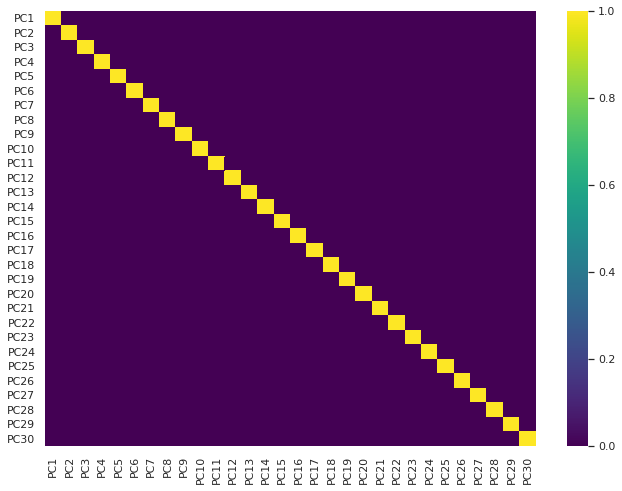

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(11,8))
sns.heatmap(pca_data.corr(), cmap='viridis')
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


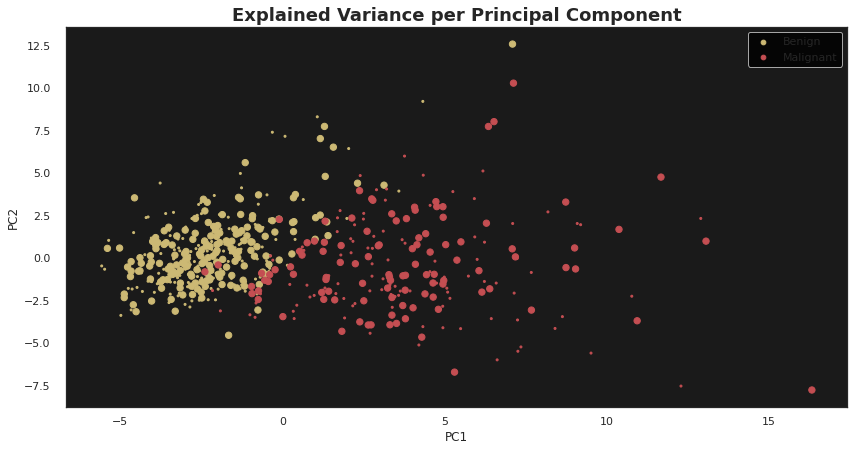

In [129]:
benig = pca_data[cancer==0]
malig = pca_data[cancer==1]

plt.figure(figsize=(14, 7))
ax = plt.subplot()
ax.scatter(x=benig['PC1'], y=benig['PC2'], s=benig['PC3'], sizes=(4, 40), c='y')
ax.scatter(x=malig['PC1'], y=malig['PC2'], s=malig['PC3'], sizes=(4, 40), c='r')
ax.set_facecolor('k')

ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=2, length=12)

ax.set(xlabel='PC1', ylabel='PC2')
plt.legend(['Benign','Malignant'])
plt.title('Explained Variance per Principal Component', fontsize=18, fontweight='bold')
plt.show()

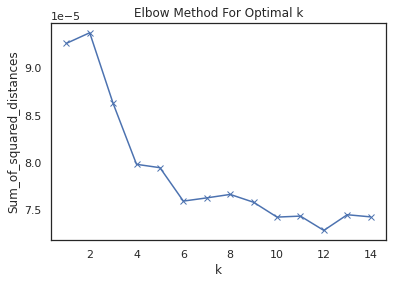

In [115]:
from sklearn.cluster import KMeans 

# keep the first 2 dimensions of the pca data
pca_reduced = pca_data[pca_data.columns[:2]]

fit_of_ks = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pca_reduced)
    fit_of_ks.append(1/(km.inertia_*k))
fit_of_ks = np.array(fit_of_ks)

plt.plot(K, fit_of_ks, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

The best number of clusters is 2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


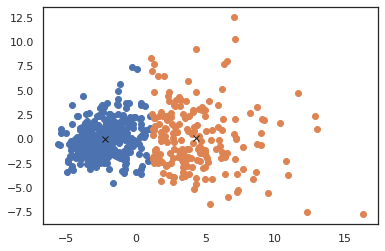

<Figure size 792x576 with 0 Axes>

In [122]:


def get_best_k(fit_of_ks):
  best_k = 0
  for i, this_k in enumerate(fit_of_ks):
    if this_k > best_k:
      best_k = this_k
    else:
      return i
best_k = get_best_k(fit_of_ks)
print('The best number of clusters is',best_k)

kmeans = KMeans(n_clusters=best_k)
kmeans.fit(pca_reduced)
labels = kmeans.labels_

pca_reduced['clusters'] = labels

def get_centroids(df, column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

def plot_clusters(df, column_header, centroids):
  fig, ax = plt.subplots()
  plt.figure(figsize=(11,8))
  ax.plot(centroids.PC1, centroids.PC2, "xk")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      ax.scatter(group.PC1, group.PC2, label=key)
  plt.show()

centroids = get_centroids(pca_reduced, 'clusters')
plot_clusters(pca_reduced, 'clusters', centroids)


In [125]:
cancer.corr(pca_reduced['clusters'])

0.7992781060761865

A simple 2-means clustering vs cancer diagnosis is 79.9% accurate.

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [ ]:
##### Your Code Here #####

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

In [ ]:
# Accuracies

# PCA 2D, 2-means clustering = 79.9%

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project